In [1]:
import networkx as nx
import numpy as np

from pyboolnet.external.bnet2primes import bnet_text2primes
from pyboolnet.state_transition_graphs import primes2stg

from scc_dags import get_scc_dag
from scc_dags import get_ordered_states
from transition_matrix import get_transition_matrix
from matrix_operations import get_block_triangular, get_reachability

In [2]:
np.set_printoptions(linewidth=1000, precision=3, suppress=True)

In [3]:


bnet = """
A, A | B & C
B, B & !C
C, B & !C | !C & !D | !B & C & D
D, !A & !B & !C & !D | !A & C & D
"""

update = "asynchronous"
# update = "synchronous"

primes = bnet_text2primes(bnet)
primes = {key: primes[key] for key in sorted(primes)}
stg = primes2stg(primes, update)

dag = get_scc_dag(stg)

# Print out the DAG structure
print("DAG Nodes with their corresponding states:")
for node in dag.nodes(data=True):
    print(f"Node {node[0]}: States = {node[1]['states']}")

print("\nDAG Edges:")
for edge in dag.edges():
    print(edge)


DAG Nodes with their corresponding states:
Node 0: States = {'1010', '1000'}
Node 1: States = {'1011'}
Node 2: States = {'1110', '1100'}
Node 3: States = {'1111', '1101'}
Node 4: States = {'1001'}
Node 5: States = {'0011'}
Node 6: States = {'0000', '0001', '0010'}
Node 7: States = {'0110', '0100'}
Node 8: States = {'0101', '0111'}

DAG Edges:
(1, 0)
(2, 0)
(3, 1)
(3, 2)
(4, 0)
(7, 2)
(7, 6)
(8, 3)
(8, 5)
(8, 7)


In [4]:
# Step 6: Build the final ordered list of states
ordered_states = get_ordered_states(dag, as_indexes=False)

# Output the ordered list of states
print("Ordered States:")
print(ordered_states)

ordered_indexes = get_ordered_states(dag, as_indexes=True)

print("Ordered Indexes:")
print(ordered_indexes)

Ordered States:
[['1001'], ['0101', '0111'], ['1101', '1111'], ['0100', '0110'], ['1011'], ['1100', '1110'], ['1000', '1010'], ['0011'], ['0000', '0001', '0010']]
Ordered Indexes:
[[9], [5, 7], [13, 15], [4, 6], [11], [12, 14], [8, 10], [3], [0, 1, 2]]


In [5]:
transition_matrix = get_transition_matrix(stg)

print("Transition Matrix:")
print(transition_matrix.__repr__())


block_triangular1 = get_block_triangular(transition_matrix, scc_indices=ordered_indexes, DEBUG=True)

print("Block Triangular Matrix:")
print(block_triangular1.__repr__())

block_triangular2 = get_block_triangular(transition_matrix, scc_dag=dag, DEBUG=True)

print("Block Triangular Matrix:")
print(block_triangular2.__repr__())

block_triangular3 = get_block_triangular(transition_matrix, stg=stg, DEBUG=True)

print("Block Triangular Matrix:")
print(block_triangular3.__repr__())

block_triangular4 = get_block_triangular(transition_matrix, DEBUG=True)

print("Block Triangular Matrix:")
print(block_triangular4.__repr__())


Transition Matrix:
array([[0.5 , 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.75, 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.25, 0.5 , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.25, 0.  , 0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.75, 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  

In [6]:
from matrix_operations import nsquare
from matrix_operations import compress_matrix
from matrix_operations import expand_matrix
from grouping import sd_grouping
from scc_dags import get_attractor_states

attractor_states = get_attractor_states(dag)

print("ordered_indexes:", ordered_indexes)
print("attractor_states:", attractor_states)

DEBUG = True

T = transition_matrix
T_inf = nsquare(T, 20, DEBUG=DEBUG)

sd_indexes = sd_grouping(bnet, DEBUG=DEBUG)
Tm = compress_matrix(T, sd_indexes, DEBUG=DEBUG)
Tm_prime = expand_matrix(Tm, sd_indexes, DEBUG=DEBUG)
Tm_inf = nsquare(Tm, 20, DEBUG=DEBUG)
Tm_inf_prime = expand_matrix(Tm_inf, sd_indexes, DEBUG=DEBUG)

# print(Tm_inf_prime)

print(get_reachability(T_inf, Tm_inf_prime, get_type="all", scc_indices=None, attractor_states=None, DEBUG=DEBUG))
print(get_reachability(T_inf, Tm_inf_prime, get_type="attractor", scc_indices=ordered_indexes, attractor_states=attractor_states, DEBUG=DEBUG))
print(get_reachability(T_inf, Tm_inf_prime, get_type="basin", scc_indices=ordered_indexes, attractor_states=attractor_states, DEBUG=DEBUG))


ordered_indexes: [[9], [5, 7], [13, 15], [4, 6], [11], [12, 14], [8, 10], [3], [0, 1, 2]]
attractor_states: [['1000', '1010'], ['0011'], ['0000', '0001', '0010']]
(np.int64(48), np.int64(2), np.int64(206), np.int64(0))
(np.int64(14), np.int64(0), np.int64(82), np.int64(0))
(np.int64(34), np.int64(2), np.int64(24), np.int64(0))


In [3]:
# Step 7: Identify attractors (sink nodes in the DAG)
attractors = [node for node, out_degree in dag.out_degree() if out_degree == 0]

attractor_states = []
for node in attractors:
    attractor_states.append(sorted(dag.nodes[node]['states']))

print("Attractors:")
print(attractors)

print("Attractor States:")
print(attractor_states)

# Step 8: For each node, find which attractors are reachable
def find_reachable_attractors(dag, start_node, attractors):
    # Perform a DFS or BFS from the start node to find reachable attractors
    reachable = set()
    to_visit = [start_node]
    while to_visit:
        current_node = to_visit.pop()
        if current_node in attractors:
            reachable.add(current_node)
        for child in dag.successors(current_node):
            if child not in reachable:
                to_visit.append(child)
    return reachable

# Step 9: Label nodes with attractor indices
for node in dag.nodes():
    reachable_attractors = find_reachable_attractors(dag, node, attractors)
    if reachable_attractors:
        # Add the indices of the reachable attractors to the node's label
        dag.nodes[node]['label'] = list(reachable_attractors)

# Step 10: Print the DAG nodes and their labels
print("DAG Nodes with Labels:")
for node, data in dag.nodes(data=True):
    print(f"Node {node}: Label = {data.get('label')}")

Attractors:
[0, 5, 6]
Attractor States:
[['1000', '1010'], ['0011'], ['0000', '0001', '0010']]
DAG Nodes with Labels:
Node 0: Label = [0]
Node 1: Label = [0]
Node 2: Label = [0]
Node 3: Label = [0]
Node 4: Label = [0]
Node 5: Label = [5]
Node 6: Label = [6]
Node 7: Label = [0, 6]
Node 8: Label = [0, 5, 6]


In [4]:
def find_decisions_in_dag(dag):
    decisions = []
    for edge in dag.edges():
        u, v = edge
        # Check if the edge is a decision transition
        if dag.nodes[u]['label'] != dag.nodes[v]['label']:
            decisions.append(edge)
    return decisions

decisions = find_decisions_in_dag(dag)
print("Decisions:")
print(decisions)

Decisions:
[(7, 2), (7, 6), (8, 3), (8, 5), (8, 7)]


In [5]:
def find_decision_transitions(dag, stg):
    decisions = find_decisions_in_dag(dag)
    decision_transitions = {}
    for edge in decisions:
        u, v = edge
        for transition in stg.edges():
            if transition[0] in dag.nodes[u]['states'] and transition[1] in dag.nodes[v]['states']:
                if edge in decision_transitions:
                    decision_transitions[edge].append(transition)
                else:
                    decision_transitions[edge] = [transition]

    return decision_transitions

decision_transitions = find_decision_transitions(dag, stg)
print("Decision Transitions:")
print(decision_transitions)

Decision Transitions:
{(7, 2): [('0110', '1110')], (7, 6): [('0110', '0010')], (8, 3): [('0111', '1111')], (8, 5): [('0111', '0011')], (8, 7): [('0101', '0100')]}


Decision DAG:
[('0110', '1110'), ('0110', '0010'), ('0111', '1111'), ('0111', '0011'), ('0101', '0100')]
[(('0101', '0100'), ('0110', '1110')), (('0101', '0100'), ('0110', '0010'))]


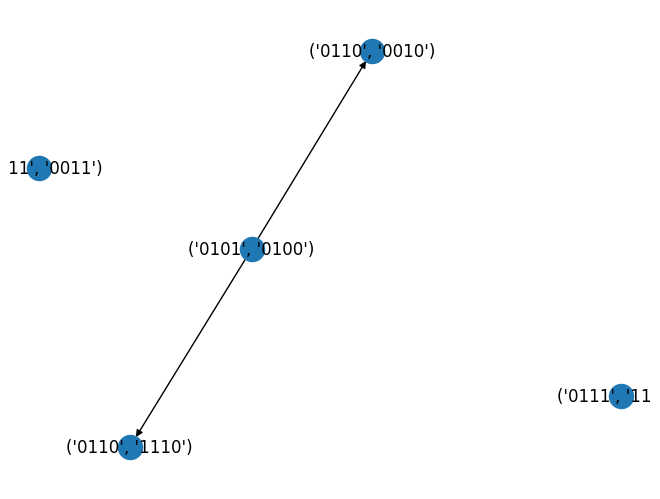

In [6]:
def get_decision_dag(dag, decision_transitions):
    decision_dag = nx.DiGraph()

    for edge, transitions in decision_transitions.items():
        for transition in transitions:
            decision_dag.add_node(transition)

    for edge in decision_transitions:
        u, v = edge
        for other_edge in decision_transitions:
            if other_edge == edge:
                continue
            other_u, other_v = other_edge
            if nx.has_path(dag, v, other_u):
                for transition in decision_transitions[edge]:
                    for other_transition in decision_transitions[other_edge]:
                        decision_dag.add_edge(transition, other_transition)

    return decision_dag

decision_dag = get_decision_dag(dag, decision_transitions)
print("Decision DAG:")
print(decision_dag.nodes())
print(decision_dag.edges())

# show the decision DAG
nx.draw(decision_dag, with_labels=True)